In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score
from imblearn.over_sampling import SMOTE

df=pd.read_csv(r"C:\Users\usre\Downloads\Employee-Attrition.csv")

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']
t1=['Attrition']

In [11]:
# Strip column names just in case
df.columns = df.columns.str.strip()

# Label Encoding for binary features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])         # Male=1, Female=0 (or vice versa)
df['OverTime'] = le.fit_transform(df['OverTime'])     # Yes=1, No=0
df['Attrition'] = le.fit_transform(df['Attrition'])   # Yes=1, No=0 (target)

print(df.head())



   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobL

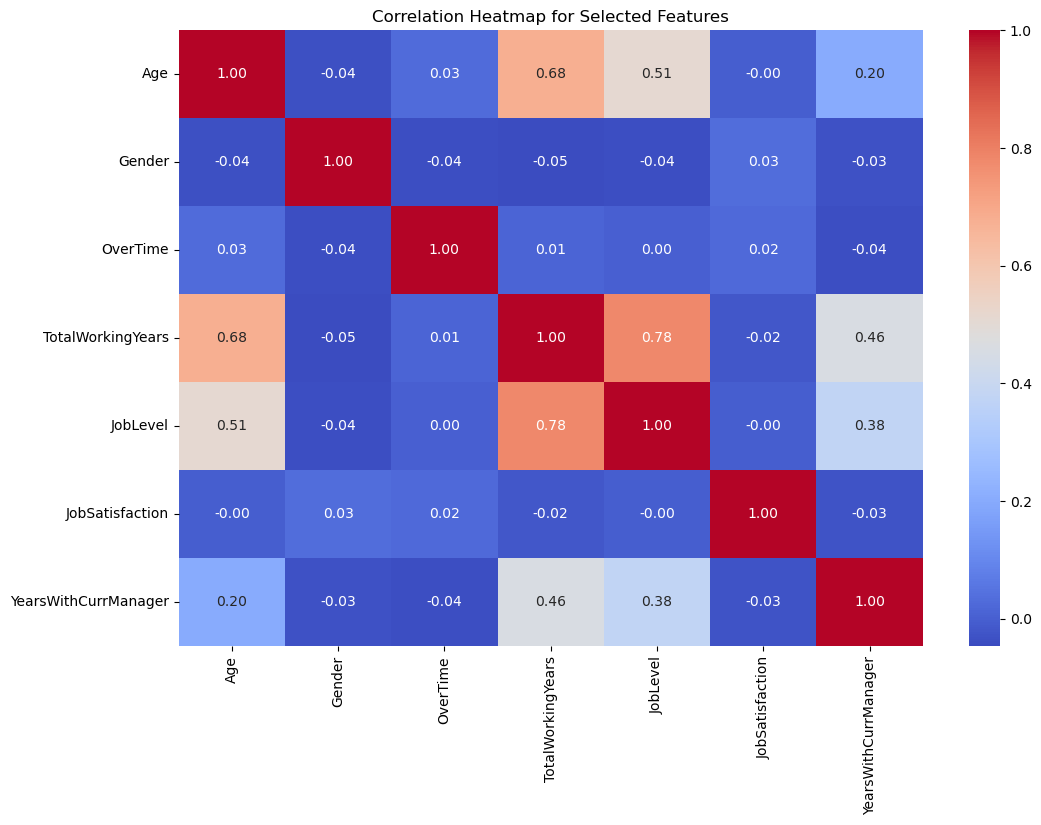

In [13]:
f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']

corr_df = df[f1]  # Make sure all column names in f1 exist in df

# Compute correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

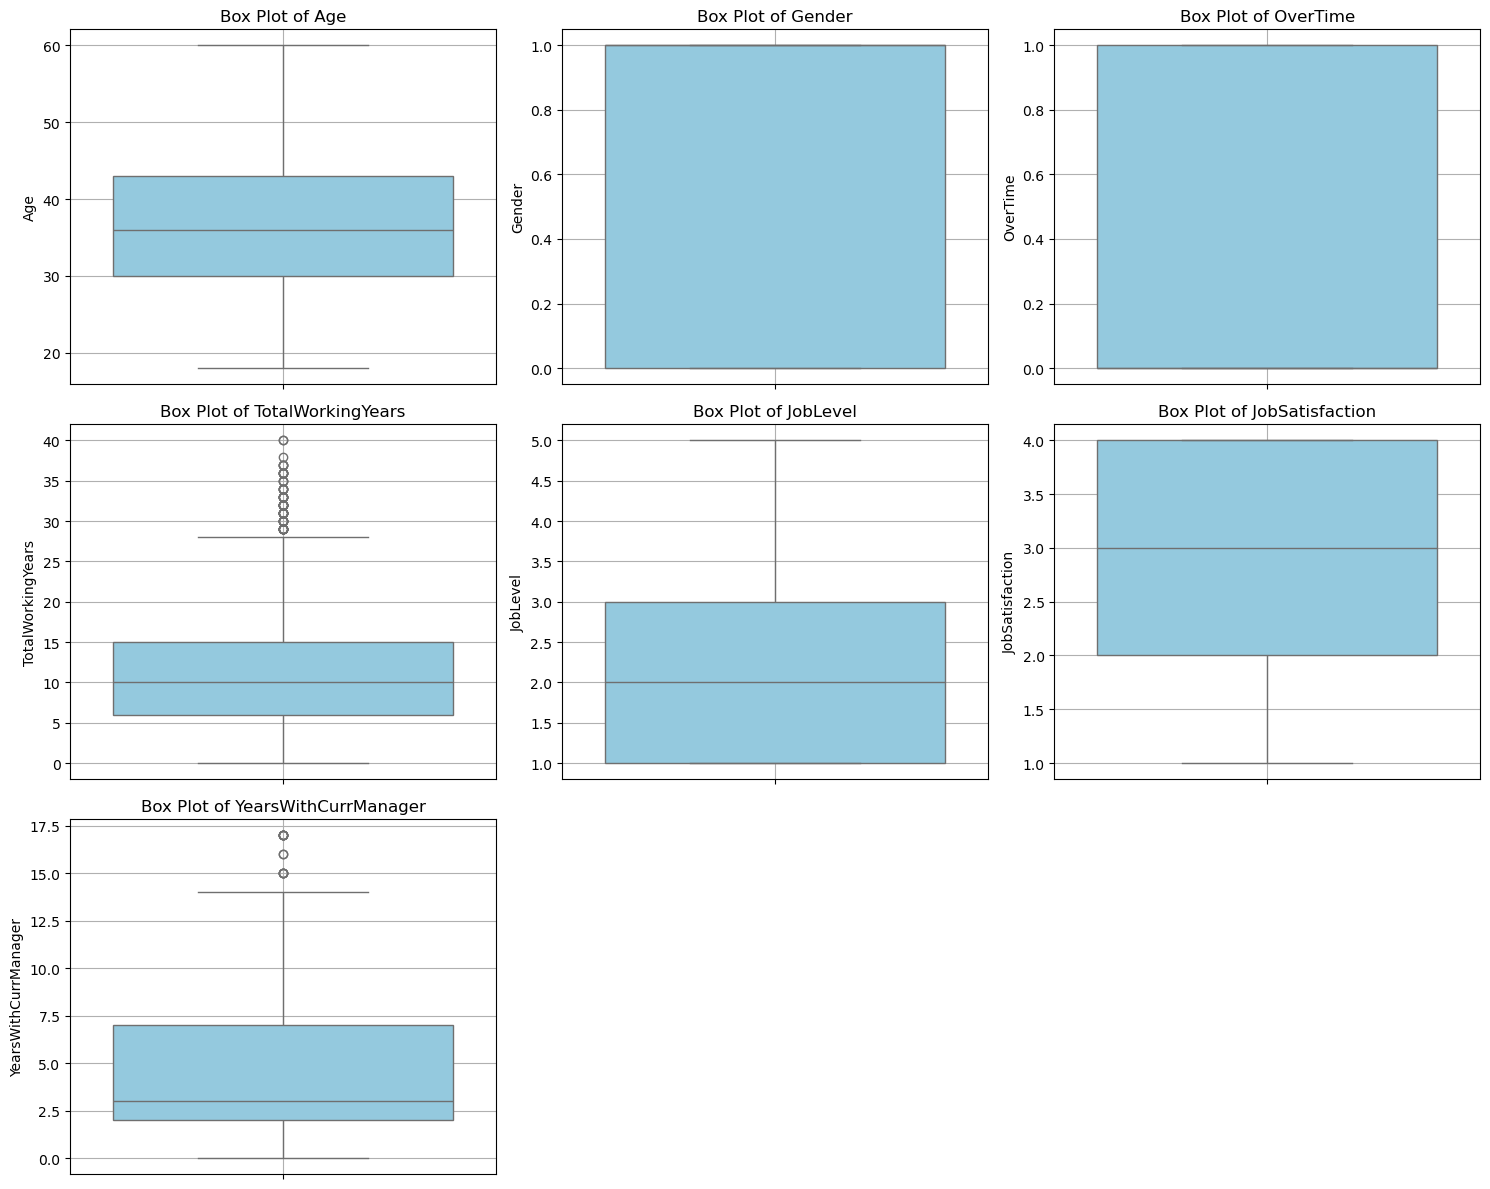

In [13]:

# Features to analyze
f1 = ['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']

cols = 3

rows = math.ceil(len(f1) / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(f1):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
f=['TotalWorkingYears','YearsWithCurrManager']
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Apply to selected columns
df[f] = df[f].apply(cap_outliers)

# Show summary of capped data
df[f].describe()

,TotalWorkingYears,YearsWithCurrManager
count,1470.000000,1470.000000
mean,11.103061,4.107483
std,7.303828,3.517487
min,0.000000,0.000000
25%,6.000000,2.000000
50%,10.000000,3.000000
75%,15.000000,7.000000
max,28.500000,14.500000


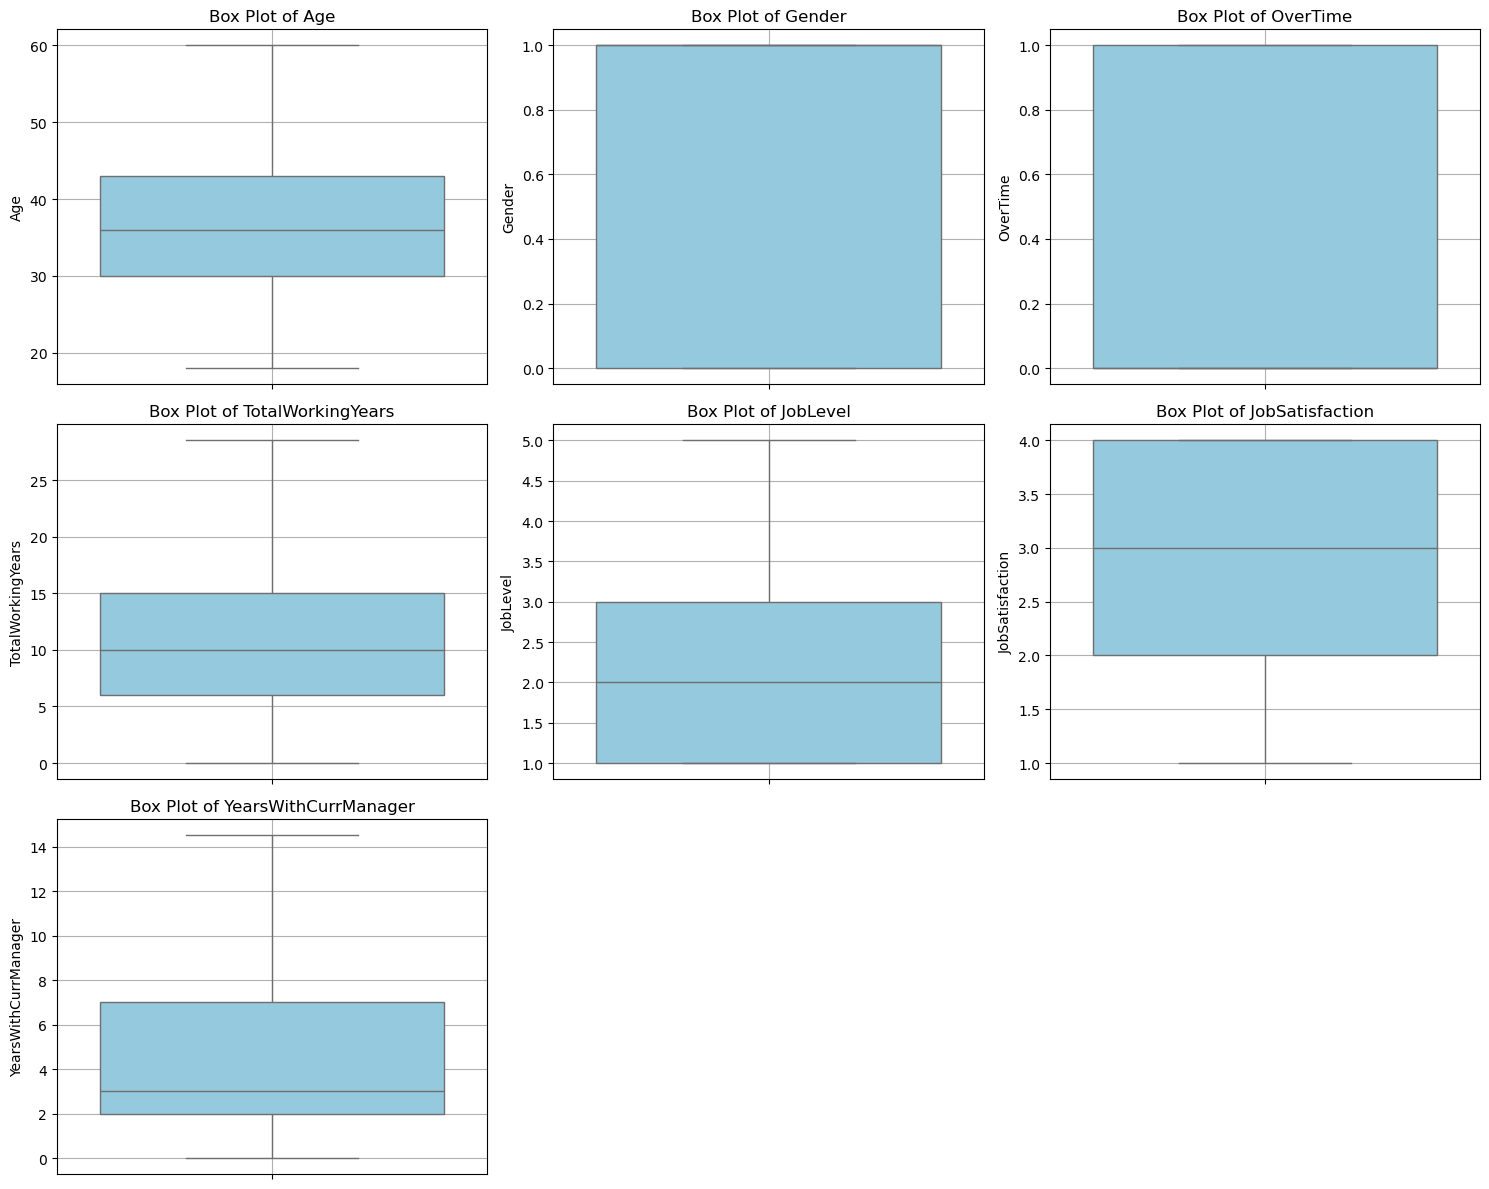

In [17]:

# Features to analyze
f1 = f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']


cols = 3

rows = math.ceil(len(f1) / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, col in enumerate(f1):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [23]:
f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']


t1=['Attrition']

X=df[f1]
y = df['Attrition']

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Scale the test data using the same parameters from the training data
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [25]:
y_train_balanced.value_counts()

Attrition
0    986
1    986
Name: count, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Train the model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities instead of labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Apply custom threshold
threshold = 0.70
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_thresh)
cm = confusion_matrix(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.84
Confusion Matrix:
[[227  20]
 [ 26  21]]
Precision: 0.51
Recall: 0.45


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target variables
f1 = f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']

t1 = ['Attrition']

X = df[f1]
y = df[t1]

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Scale the test data using the same parameters from the training data
X_test_scaled = scaler.transform(X_test)

# Train the model with custom class weights
model = LogisticRegression(class_weight={0: 1, 1: 7}, random_state=42)  # Adjust weights here
model.fit(X_train_scaled, y_train)

# Predict probabilities instead of labels
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Apply custom threshold
threshold = 0.60
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_thresh)
cm = confusion_matrix(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.74
Confusion Matrix:
[[186  61]
 [ 15  32]]
Precision: 0.34
Recall: 0.68
F1 Score: 0.46


C:\Users\usre\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Feature selection
f1 = f1=['Age','Gender','OverTime','TotalWorkingYears','JobLevel','JobSatisfaction','YearsWithCurrManager']

t1 = ['Attrition']

X = df[f1]
y = df[t1]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Random Forest with custom class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Step 6: Predict probabilities
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Step 7: Find best threshold by F1 score
best_threshold = 0
best_f1 = 0
best_metrics = {}
best_y_pred = None

for threshold in np.arange(0.25, 0.51, 0.01):
    y_pred_thresh = (y_probs >= threshold).astype(int)
    
    f1 = f1_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_metrics = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        best_y_pred = y_pred_thresh  # save the predictions

# Step 8: Final evaluation using best threshold
accuracy = accuracy_score(y_test, best_y_pred)
cm = confusion_matrix(y_test, best_y_pred)

print(f'Best Threshold: {best_threshold:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {best_metrics["Precision"]:.2f}')
print(f'Recall: {best_metrics["Recall"]:.2f}')
print(f'F1 Score: {best_metrics["F1 Score"]:.2f}')


C:\Users\usre\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Threshold: 0.26
Accuracy: 0.71
Confusion Matrix:
[[181  66]
 [ 18  29]]
Precision: 0.31
Recall: 0.62
F1 Score: 0.41


In [43]:
import pickle

# Assuming you have a trained model (e.g., a RandomForestClassifier)import pickle

# Assume your new trained model is named `rf_model`
with open('Randomforestfinal.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("model saved successfully!")

model saved successfully!


In [45]:
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [41]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\usre
